## Test installation of IRkernel

In [2]:
bleh <- installed.packages()

In [3]:
'devtools' %in% bleh
'IRkernel' %in% bleh

[1] TRUE

[1] TRUE

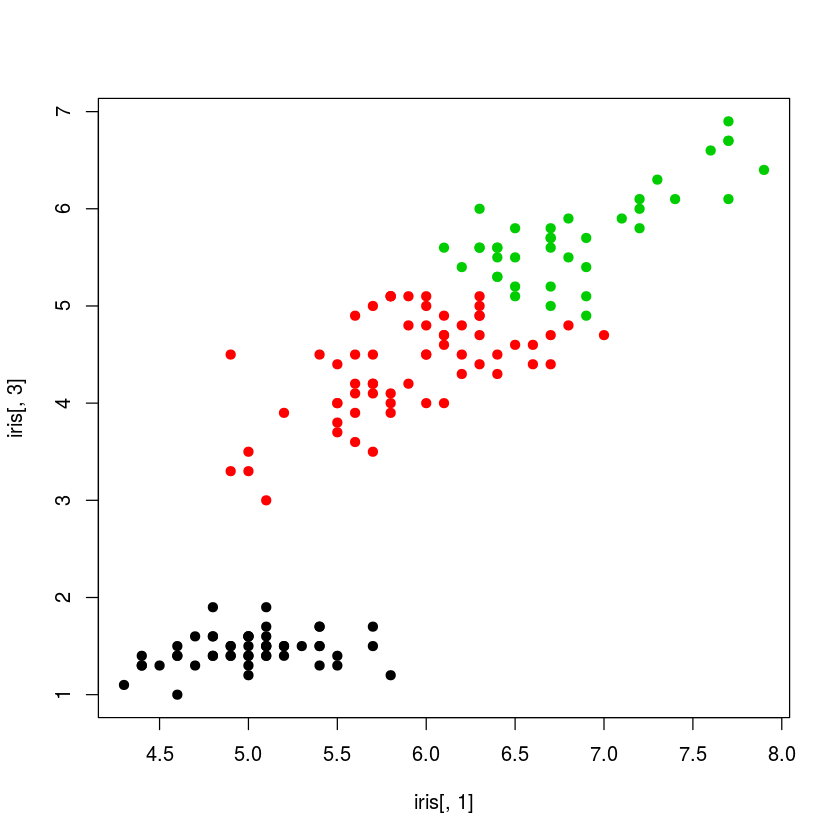

In [14]:
kmeans_clusters <- kmeans(iris[,1:4], 3, 20)
plot(iris[,1], iris[,3], col=kmeans_clusters$cluster, pch=19)

## Test installation of Rpy2

### From Python to R

#### Stright Python

In [16]:
import pandas as pd
fish = pd.read_csv('fish.csv', header=None)
fish.columns = ['species', 'a', 'b', 'c', 'd', 'e', 'f' ]
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
species    85 non-null object
a          85 non-null float64
b          85 non-null float64
c          85 non-null float64
d          85 non-null float64
e          85 non-null float64
f          85 non-null float64
dtypes: float64(6), object(1)
memory usage: 4.7+ KB


#### Invoking R

In [85]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


[1] "character"
[1] "factor"
[1] "data.frame"
  species         a                b               c               d        
 Bream:34   Min.   :   0.0   Min.   : 9.30   Min.   : 9.80   Min.   :10.80  
 Pike :17   1st Qu.: 120.0   1st Qu.:19.40   1st Qu.:21.00   1st Qu.:23.70  
 Roach:20   Median : 390.0   Median :28.40   Median :30.70   Median :35.00  
 Smelt:14   Mean   : 431.8   Mean   :27.34   Mean   :29.56   Mean   :33.12  
            3rd Qu.: 650.0   3rd Qu.:32.70   3rd Qu.:36.00   3rd Qu.:40.60  
            Max.   :1650.0   Max.   :59.00   Max.   :63.40   Max.   :68.00  
       e               f        
 Min.   :14.50   Min.   : 8.70  
 1st Qu.:16.90   1st Qu.:11.00  
 Median :27.10   Median :13.70  
 Mean   :28.08   Mean   :12.87  
 3rd Qu.:39.20   3rd Qu.:14.70  
 Max.   :44.50   Max.   :16.10  


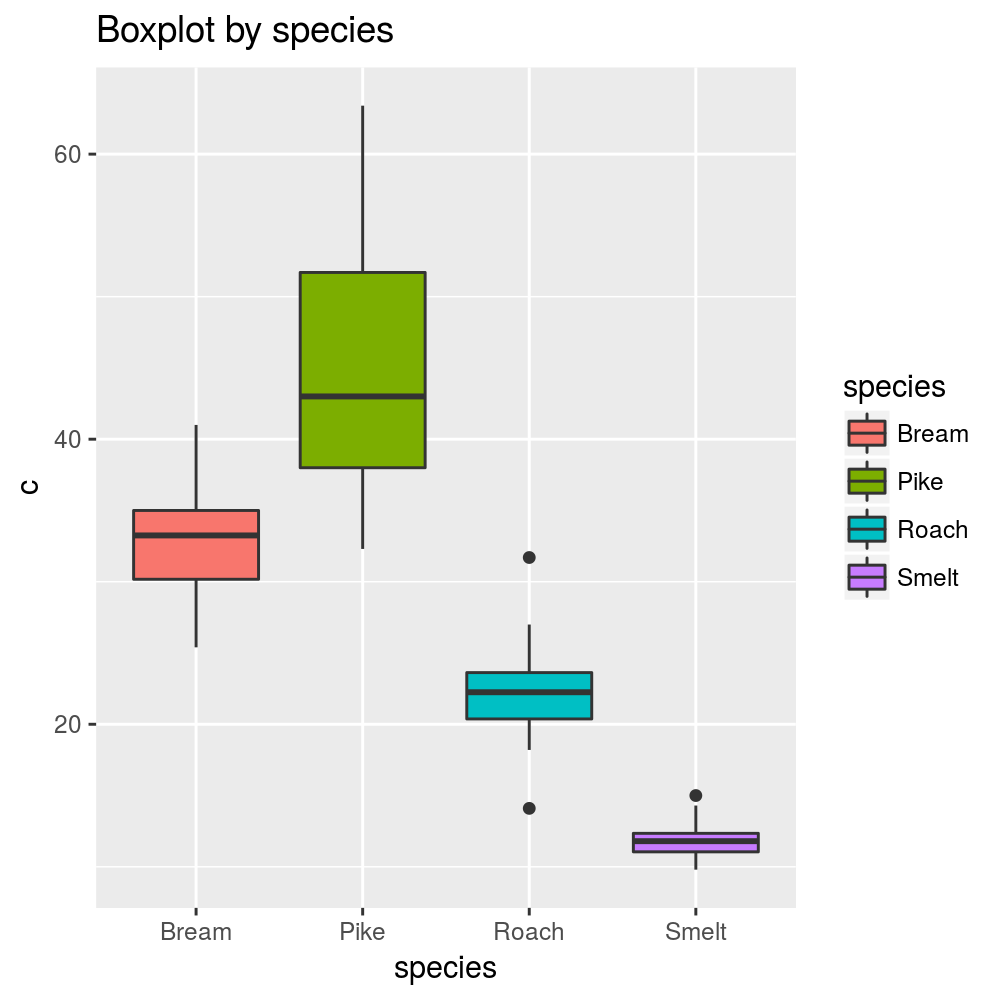

In [84]:
%%R -i fish -w 5 -h 5 --units in -r 200 ## in R, input 'fish', and set plotting width height and resolution

library(ggplot2)
print(class(fish$species))
fish$species = as.factor(fish$species)
print(class(fish$species))

print( class(fish) )
print( summary(fish) )
head( fish )

ggplot(fish, aes( x=species, y=c, fill=species)) + 
    geom_boxplot() +
    ggtitle( 'Boxplot by species' )

#### From R to Python

In [86]:
# need to call this line (if haven't already done so)
# %load_ext rpy2.ipython

In [102]:
%R -o iris # R output iris
iris.head()

/home/david/.local/lib/python3.5/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


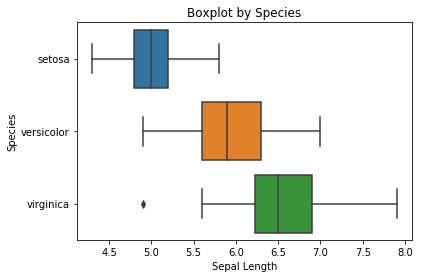

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.boxplot(data=iris,
            x='Sepal.Length',
            y='Species',
           ax=ax)

ax.set(xlabel="Sepal Length",
       title="Boxplot by Species"
      )
plt.show()